In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# load rankings data here:
wood = pd.read_csv('Golden_Ticket_Award_Winners_Wood.csv')
steel= pd.read_csv('Golden_Ticket_Award_Winners_Steel.csv')
wood['Type'] = 'wood'
steel['Type'] = 'steel'
roller_coasters = pd.read_csv('roller_coasters.csv')
full = pd.concat([wood, steel]).reset_index()

In [53]:
# Database cleaning
names_replace = [
    ('Grizzly \(KD\)', 'Grizzly'),
    ('Intimidator-305', 'Intimidator 305'),
    ('Superman: The Ride', 'Superman The Ride'),
    ('^The ', '')]
parks_replace = [
    ('Conneaut Lake Park', 'Conneaut Lake'),
    ('Luna Park/Coney Island', 'Luna Park'),
    ('Califoria’s Great America', 'California’s Great America'),
    ('Mt. Olympus Theme Park', 'Mount Olympus'),
    ('Oakwood Leisure Park', 'Oakwood'),
    ('PNE Playland', 'Playland'),
    ('ZDTs', "ZDT’s"),
    ('Fun Spot America', 'Fun Spot')]

for i in names_replace:
    full['Name'] = full['Name'].str.replace(i[0], i[1])
for i in parks_replace:
    full['Park'] = full['Park'].str.replace(i[0], i[1])

roller_coasters.loc[683, 'height'] = 9.2
roller_coasters.loc[730, 'height'] = 9.2

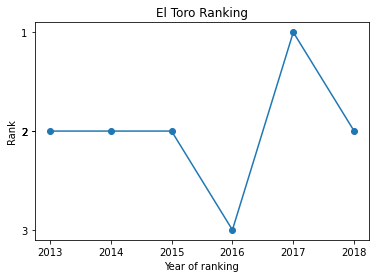

In [82]:
# write function to plot rankings over time for 1 roller coaster here:
def rc_rank(rc_name, park, df_rank):
  rc_filter = df_rank[(df_rank.Name == rc_name) & (df_rank.Park == park)]
  ax = plt.subplot()
  ax.plot(rc_filter['Year of Rank'], rc_filter.Rank, marker = 'o')
  ax.set_xticks(rc_filter['Year of Rank'].values)
  ax.set_yticks(rc_filter.Rank.values)
  ax.invert_yaxis()
  plt.title('{} Ranking'.format(rc_name))
  plt.xlabel('Year of ranking')
  plt.ylabel('Rank')
  plt.show()

rc_rank('El Toro', 'Six Flags Great Adventure', full)

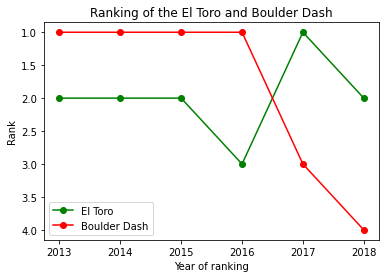

In [81]:
# write function to plot rankings over time for 2 roller coasters here:
def double_rc_rank(rc1_name, rc1_park, rc2_name, rc2_park, df_rank):
  rc1_filter = df_rank[(df_rank.Name == rc1_name) & (df_rank.Park == rc1_park)]
  rc2_filter = df_rank[(df_rank.Name == rc2_name) & (df_rank.Park == rc2_park)]
  ax = plt.subplot()
  ax.plot(rc1_filter['Year of Rank'], rc1_filter.Rank, marker = 'o', color = 'green', label = rc1_name)
  ax.plot(rc2_filter['Year of Rank'], rc2_filter.Rank, marker = 'o', color = 'red', label = rc2_name)
  ax.invert_yaxis()
  plt.title('Ranking of the ' + rc1_name + ' and ' + rc2_name)
  plt.xlabel('Year of ranking')
  plt.ylabel('Rank')
  plt.legend()
  plt.show()

double_rc_rank('El Toro', 'Six Flags Great Adventure', 'Boulder Dash', 'Lake Compounce', full)

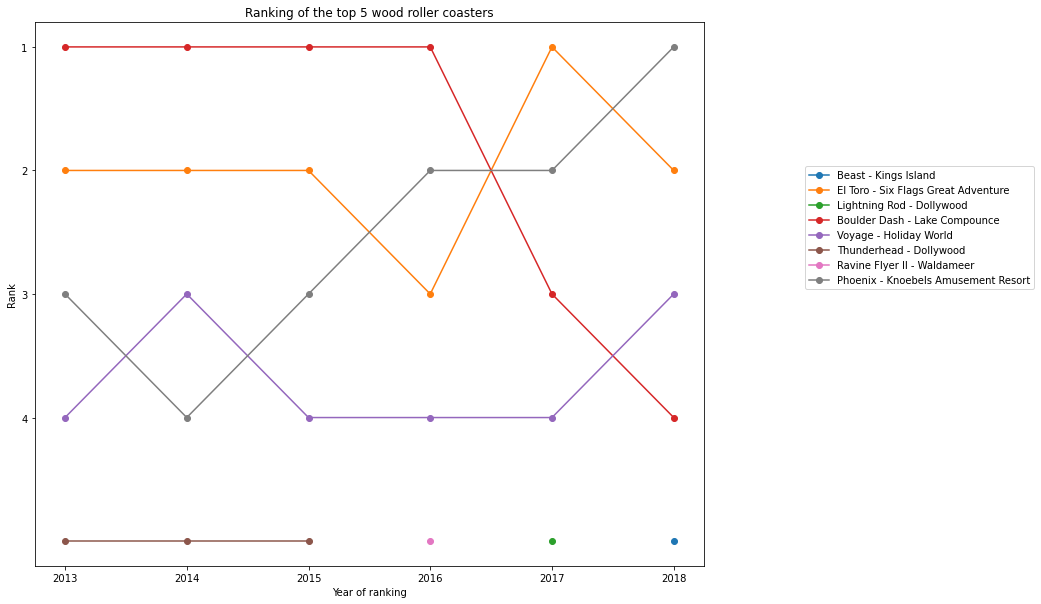

In [237]:
# write function to plot top n rankings over time here:
def n_rc_rank(n, df_rank, rc_type):
    rank_filter = df_rank[df_rank.Rank <= n].reset_index(drop=True)
    rank_filter.Name = rank_filter.Name + ' - ' + rank_filter.Park
    fig, ax = plt.subplots(figsize=(12, 10))
    for coaster in set(rank_filter.Name):
        coaster_filter = rank_filter[rank_filter.Name == coaster].reset_index(drop=True)
        coaster_filter.sort_values('Year of Rank', inplace=True)
        ax.plot(coaster_filter['Year of Rank'], coaster_filter.Rank, marker = 'o', label=coaster)
    ax.set_yticks([i for i in range(1, n)])
    ax.invert_yaxis()
    plt.title('Ranking of the top ' + str(n) + ' ' + rc_type + ' roller coasters')
    plt.xlabel('Year of ranking')
    plt.ylabel('Rank')
    plt.legend(loc=4, bbox_to_anchor=(1.5, 0.5))
    plt.show()

n_rc_rank(5, full[full.Type == 'wood'], 'wood')

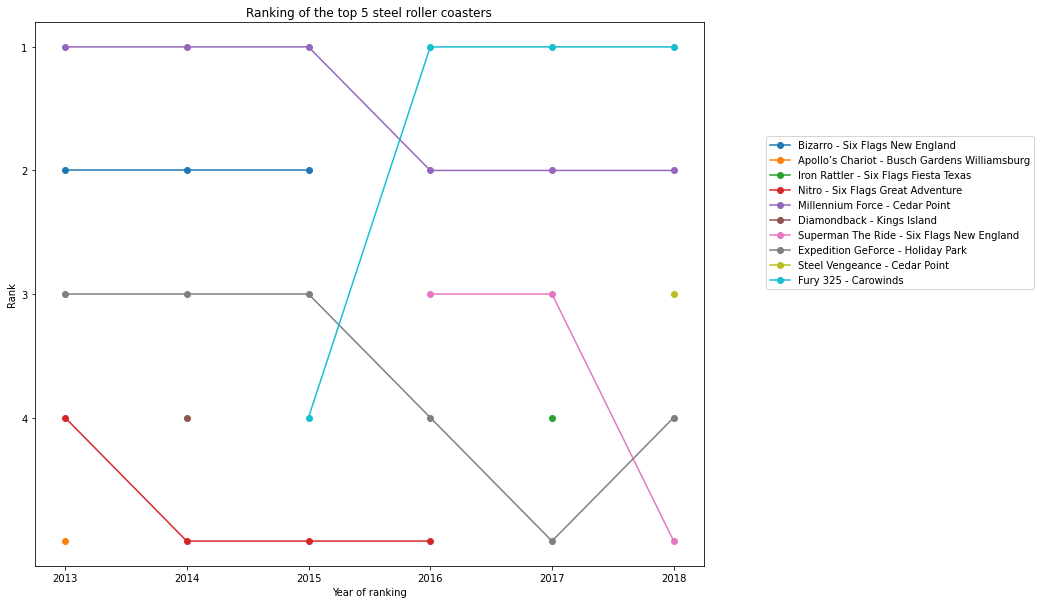

In [79]:
n_rc_rank(5, full[full.Type == 'steel'], 'steel')

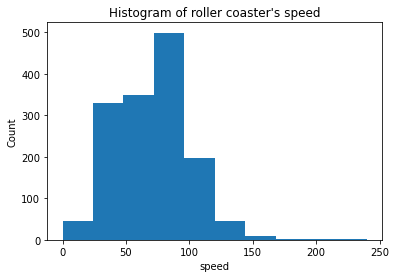

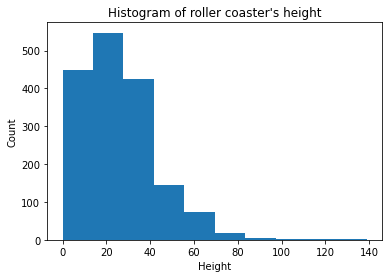

In [78]:
# write function to plot histogram of column values here:

def hist_col(df, col_name):
  plt.hist(df[col_name].dropna())
  plt.title("Histogram of roller coaster's {}".format(col_name))
  plt.xlabel(col_name)
  plt.ylabel('Count')
  plt.show()

def hist_height(df):
  df_height = df[df.height <= 140]
  plt.hist(df_height.height.dropna())
  plt.title("Histogram of roller coaster's height")
  plt.xlabel('Height')
  plt.ylabel('Count')
  plt.show()

hist_col(roller_coasters, 'speed')
hist_height(roller_coasters)

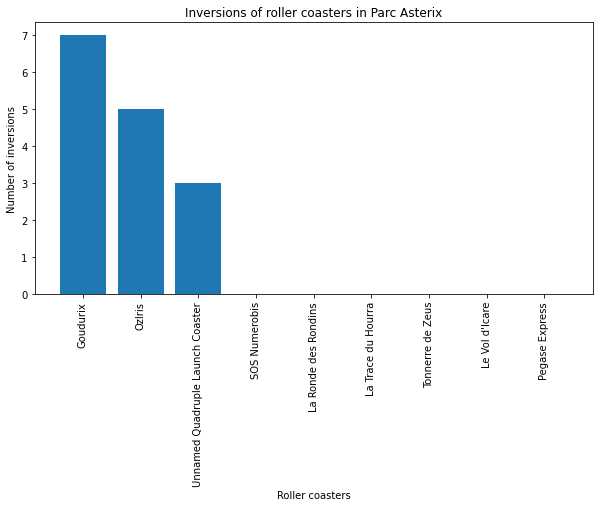

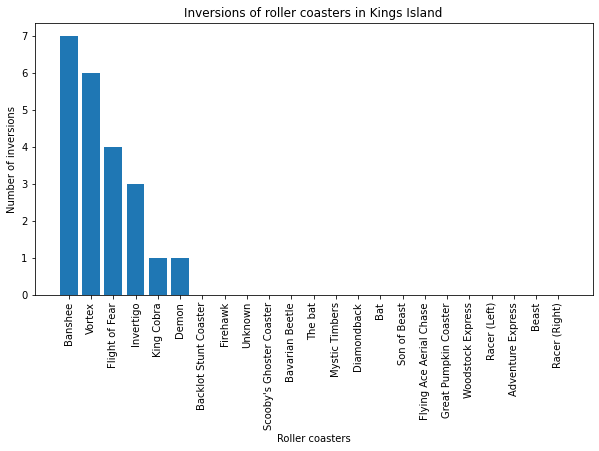

In [129]:
# write function to plot inversions by coaster at a park here:
def number_inversions(df, park):
  df_filter = df[df.park == park]
  df_filter = df_filter.sort_values('num_inversions', ascending=False)
  list_rc = df_filter.name
  list_inversions = df_filter.num_inversions
  fig, ax = plt.subplots(figsize=(10, 5))
  plt.bar(range(len(list_rc)), list_inversions)  
  ax.set_xticks(range(len(df_filter)))
  ax.set_xticklabels(list_rc, rotation=90)
  ax.tick_params(axis='x', labelsize=10)
  plt.xlabel('Roller coasters')
  plt.ylabel('Number of inversions')
  plt.title('Inversions of roller coasters in {}'.format(park))
  plt.show()

number_inversions(roller_coasters, 'Parc Asterix')
number_inversions(roller_coasters, 'Kings Island')

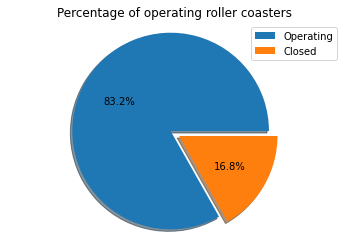

In [85]:
# write function to plot pie chart of operating status here:
def rc_status(df):
  count_operating = len(df[df.status == 'status.operating'])
  count_closed = len(df[df.status == 'status.closed.definitely'])
  fig, ax = plt.subplots()
  ax.pie([count_operating, count_closed], explode = (0, 0.1), shadow=True, autopct='%0.1f%%')
  ax.axis('equal')
  plt.title('Percentage of operating roller coasters')
  plt.legend(['Operating', 'Closed'])
  plt.show()

rc_status(roller_coasters)

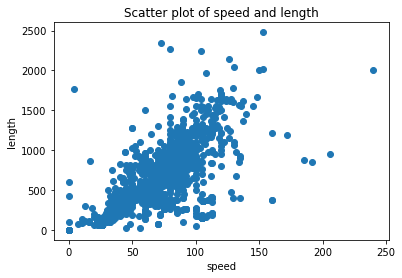

<Figure size 432x288 with 0 Axes>

In [75]:
# write function to create scatter plot of any two numeric columns here:
def scatter_cols(df, col_1, col_2):
  fig, ax = plt.subplots()
  ax.scatter(df[col_1], df[col_2])
  plt.title('Scatter plot of {} and {}'.format(col_1, col_2))
  plt.xlabel(col_1)
  plt.ylabel(col_2)
  plt.show()

scatter_cols(roller_coasters, 'speed', 'length')
plt.clf()

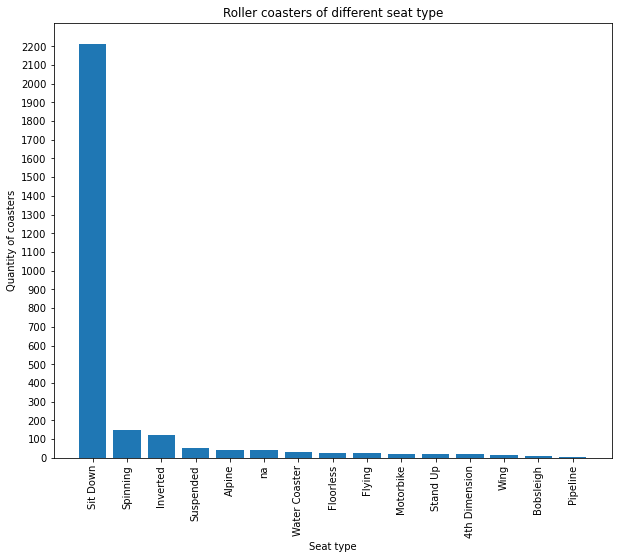

<Figure size 432x288 with 0 Axes>

In [91]:
# What roller coaster seating type is most popular?
sit_type = roller_coasters.groupby('seating_type').name.count().reset_index()
sit_type.columns = {'type', 'qty'}
sit_type = sit_type.sort_values('qty', ascending=False)
x_type = range(len(sit_type.type))
fig, ax = plt.subplots(figsize=(10, 8))
ax.bar(x_type, sit_type.qty)
ax.set_xticks(x_type)
ax.set_yticks(range(0,2300,100))
ax.set_xticklabels(sit_type.type, rotation=90)
plt.xlabel('Seat type')
plt.ylabel('Quantity of coasters')
plt.title('Roller coasters of different seat type')
plt.show()
plt.clf()

In [ ]:
#Do different seating types result in higher/faster/longer roller coasters?

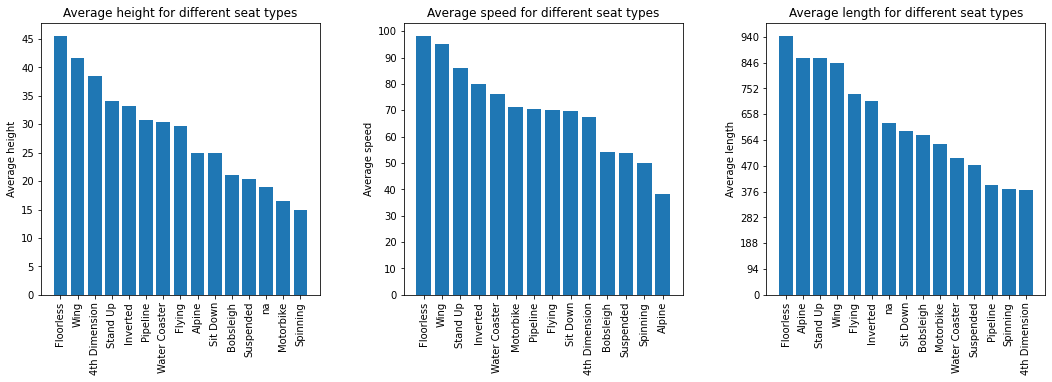

In [235]:
def seattype_influence(df, rc_char):
    ax = plt.gca()
    data = df[['seating_type', rc_char]].copy()
    mean_char = data.groupby('seating_type').mean().reset_index().dropna()
    mean_char.sort_values(rc_char, ascending=False, inplace=True)
    plt.bar(mean_char.seating_type, mean_char[rc_char])
    ax.set_xticklabels(mean_char.seating_type, rotation=90)
    ax.set_yticks(range(0, int(mean_char[rc_char].max()) + 5, int((int(mean_char[rc_char].max()) + 5) / 10)))
    plt.ylabel('Average ' + rc_char)
    plt.title('Average {} for different seat types'.format(rc_char))

plt.figure(figsize=(18, 5))
plt.subplots_adjust(wspace=0.3)
plt.subplot(1, 3, 1)
seattype_influence(roller_coasters, 'height')
plt.subplot(1, 3, 2)
seattype_influence(roller_coasters, 'speed')
plt.subplot(1, 3, 3)
seattype_influence(roller_coasters, 'length')
plt.show()


In [ ]:
Do roller coaster manufacturers have any specialties (do they focus on speed, height, seating type, or inversions)?
Do amusement parks have any specialties?  TODO